# Introduction to Solving SDEs

In this example we show you how to define an SDE problem, solve it, and plot it. Let's look at the linear stochastic differential equation:

$$ dX_t = \alpha X_t dt + \beta X_t dW_t. $$

We can describe this generically in the form

$$ dX_t = f(X_t,t)dt + \sigma(X_t,t)dW_t $$

where $f$ is known as the drift coefficient and $\sigma$ is known as the diffusion coefficient. We can define an SDEProblem in DifferentialEquations.jl by assigning these two functions. Let's take $\alpha = 0.25$ and $\beta = 0.5$, and let the initial condition be $u_0 = 1$. Thus we define the problem by the commands:

In [1]:
using DifferentialEquations
α = 0.25
β = 0.5
f(x,t) = α*x
σ(x,t) = β*x
prob = SDEProblem(f,σ,1.0)

DifferentialEquations.SDEProblem(f,σ,1.0,(anonymous function),false,1,(1,))

Notice that we used the initial condition as $1.0$ instead of $1$. This is because DifferentialEquations.jl does the calculations in the provided number type. Therefore, giving it an integer as the starting value will error because it will be assuming that the solution should be in integers. Thus in most cases you may want to set the initial condition as a Float64. However, this design has the side-effect that any numbers can be used in DifferentialEquations.jl. See the notebook on arbitrary arithmetic for more information on using things like BigFloats, Rational{BigInt}, or other crazy numbers.

Let's define the timespan to be $[0,1]$ and give it an initial timestep of $\frac{1}{2^4}$. The commands are the same with ODEs: to solve the problem we call `solve`, to plot the problem we call `plot`, and the keyword arguments work similarly. Thus we solve and plot with the commands

[Plots.jl] Initializing backend: pyplot



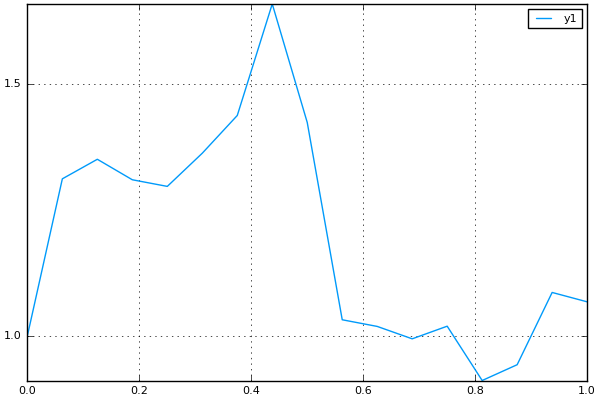

In [2]:
Δt = 1//2^(4) #The initial timestepping size. It will automatically assigned if not given.
tspan = [0,1] # The timespan. This is the default if not given.
sol =solve(prob::SDEProblem,tspan,Δt=Δt,save_timeseries=true,alg=:EM)
plot(sol)

## Obtaining a More Precise Solution

The Euler-Maruyama algorithm `:EM`, is the most common algorithm for solving stochastic differential equations. Most Let's investigate how well this does. As with all DEProblem types in DifferentialEquations.jl, the SDEProblem allows you to specify a true solution in cases where it is known. Here, by Ito's formula we can derive that the solution to the linear SDE is

$$ X^{true}_t = X_0 \exp\left(\left(\alpha - \frac{\beta^2}{2}\right)t + \beta W_t\right) $$


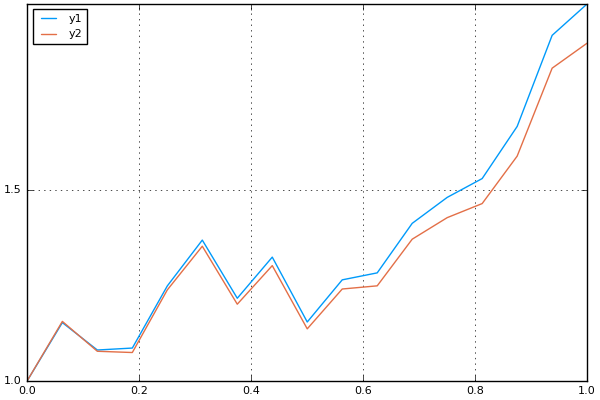

In [9]:
truesol(u₀,t,W) = u₀*exp((α-(β^2)/2)*t+β*W)
prob = SDEProblem(f,σ,1.0,analytic=truesol)
sol = solve(prob::SDEProblem,tspan,Δt=Δt,save_timeseries=true,alg=:EM)
plot(sol,plot_analytic=true)

The Euler-Maruyama method does okay, but is visibly off from the true solution in many cases. Luckily, the developer of DifferentialEquations.jl does research in numerical methods for stochastic (partial) differential equations! Included are the recent Rossler-type Runge-Kutta algorithms which are both efficient and accurate. We can call the optimized version of the general method, SRI, a Strong Order 1.5 method, with the following command:


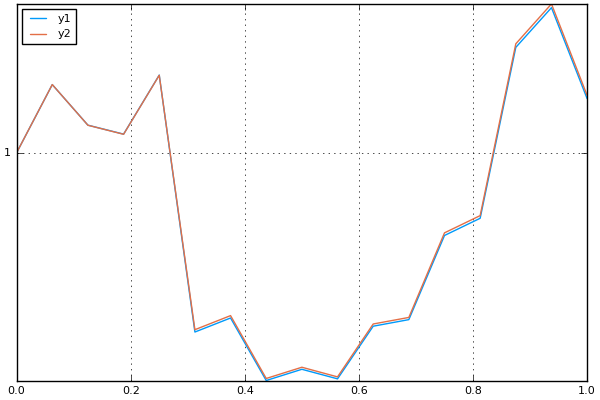

In [10]:
sol = solve(prob::SDEProblem,tspan,Δt=Δt,save_timeseries=true,alg=:SRIW1Optimized)
plot(sol,plot_analytic=true)

Now we reliably track the true solution closely.